# Making predictions and decisions with medical trial data

We have data for 6 studies that have been done on the effect of *specific allergen immunotherapy* (SIT) on eczema and the following success rates have been observed. In each of the trials, the investigator rated whether each patient's condition improved or not.

This data set is from the [Cochrane Database of Systematic Reviews](http://www.cochranelibrary.com/) article cited below, available for free [here](http://onlinelibrary.wiley.com/doi/10.1002/14651858.CD008774.pub2/full). The Cochrane Database is a great resource for high quality data on all sorts of medical trials.

> Tam H., Calderon M.A., Manikam L., Nankervis H., García Núñez I., Williams H.C., Durham S., Boyle R.J. (2016). Specific allergen immunotherapy for the treatment of atopic eczema. *Cochrane Database of Systematic Reviews, Issue 2*. Art. No.: CD008774. DOI: 10.1002/14651858.CD008774.pub2.

| Study          | Improved | Not improved |
|:-------------- | --------:| ------------:|
| Di Rienzo 2014 | 20       | 3            |
| Galli 1994     | 10       | 6            |
| Kaufman 1974   | 13       | 3            |
| Qin 2014       | 35       | 10           |
| Sanchez 2012   | 22       | 9            |
| Silny 2006     | 7        | 3            |
| **Totals**     | **107**  | **34**       |

## Task 1: Modeling
**Build a statistical model for this data set.** As your data, use the total number of patients improved (107) and not improved (34).

**Steps in the modeling process:**
1. Motivate why the **binomial** distribution is an appropriate **likelihood function** for this type of data.
    1. Make sure the support of your likelihood function matches the type of data we are working with.
    2. Describe the unobserved parameter(s) of your model, and describe how it/they can be interpreted.
2. Use the conjugate **beta prior distribution**.
    1. Select appropriate values for the prior hyperparameters and motivate your choice.
    2. Visualize your prior distribution.
3. Compute and visualize the posterior distribution over the unobserved parameter(s) of your model. Also describe what the posterior tells you about the parameter(s).

Feel free to discuss this task with other students in the course, or attempt it on your own if you prefer. Discussing your modeling ideas with other students is a useful way to get feedback on your assumptions.

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.special as sc

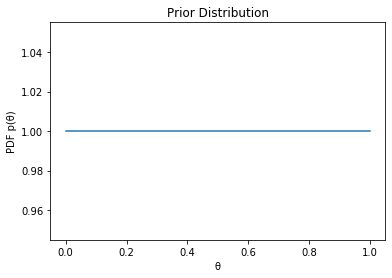

In [7]:
# prior distribution hyperparameters
thetas = np.linspace(start=0,stop=1,num=100)
a_prior = 1
b_prior = 1

# plotting the prior distribution
plt.plot(thetas,sts.beta.pdf(x=thetas,a=a_prior,b=b_prior))
plt.title('Prior Distribution')
plt.xlabel('θ')
plt.ylabel('PDF p(θ)')
plt.show()

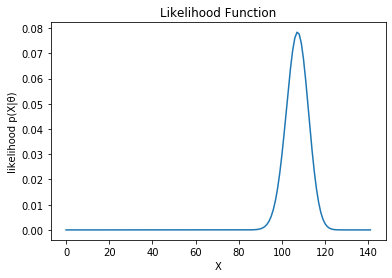

In [8]:
# data
num_improved = 107
num_not_improved = 34

# data from data
N = num_improved+num_not_improved
X = num_improved
xs = np.linspace(start=0,stop=N,num=N+1) #likelihood is discrete

# plotting the likelihood function
plt.plot(xs,sts.binom.pmf(k=xs,n=N,p=X/N))
plt.title('Likelihood Function')
plt.xlabel('X')
plt.ylabel('likelihood p(X|θ)')
plt.show()

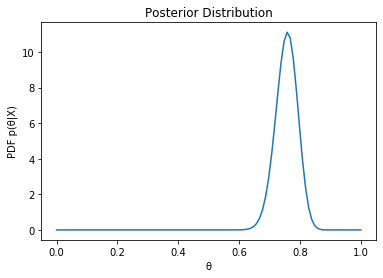

In [9]:
# posterior distribution hyperparameters
a_posterior = a_prior+X
b_posterior = b_prior+N-X

# plotting the posterior distribution
plt.plot(thetas,sts.beta.pdf(x=thetas,a=a_posterior,b=b_posterior))
plt.title('Posterior Distribution')
plt.xlabel('θ')
plt.ylabel('PDF p(θ|X)')
plt.show()

## Task 2: Questions, predictions, and decisions
1. **Beta-binomial posterior predictive distribution:** Use your model to predict how many patients would improve if we treated 100 new eczema patients using SIT. Express your answer as a probability distribution over the number of patients improved.
2. Use your posterior to answer these questions:
    1. What is the probability that at least two thirds of eczema patients get better with SIT?
    2. What is the probability that at least 75% of eczema patients get better with SIT?
3. Use your model to decide whether the treatment works or not. Motivate your answer.

The beta-binomial distribution has the following parameters.

* \(n \in \mathbb{N}_0\) – the number of trials
* \(\alpha, \beta \in \mathbb{R}^+\) – corresponding to the parameters of the beta distribution

The probability mass function of the beta-binomial distribution is

\[p(k | n,\alpha,\beta) = \binom{n}{k}\frac{B(k+\alpha,n-k+\beta)}{B(\alpha,\beta)}\]

where \(B\) is the beta function. See the code below for how to evaluate the beta-binomial pmf in Python.

In [10]:
# Beta-binomial pmf with k successful trials out of n total
# trials and alpha and beta parameters.
def beta_binomial_pmf(k, n, alpha, beta):
    return sc.comb(n, k) * sc.beta(k + alpha, n - k + beta) / sc.beta(alpha, beta)

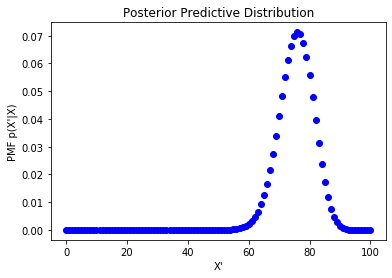

In [11]:
# posterior predictive hyperparameters
N_new = 100
ks = np.linspace(start=0,stop=N_new,num=N_new+1)

plt.plot(ks,beta_binomial_pmf(k=ks,n=N_new,alpha=a_posterior,beta=b_posterior),'bo')
plt.title('Posterior Predictive Distribution')
plt.xlabel('X\'')
plt.ylabel('PMF p(X\'|X)')
plt.show()

In [12]:
# probability of 'at least'
def at_least_beta_binomial(p,n,alpha,beta):
    # takes in the 'at least' probability, p
    # because of this, k needs to be rounded "down"
    k = math.floor(p*n)
    
    until = 0
    for i in range(k):
        until += beta_binomial_pmf(k=i,n=n,alpha=alpha,beta=beta)
        
    print('posterior probability prediction p(X\'>=%d%%*N_new): %.3f'\
         %(p*100,1-until))
    return 1-until


In [13]:
# at least two-thirds
at_least_beta_binomial(p=2/3,n=N_new,alpha=a_posterior,beta=b_posterior)


posterior probability prediction p(X'>=66%*N_new): 0.958


0.9578788695620643

In [14]:
# at least 75%
at_least_beta_binomial(p=.75,n=N_new,alpha=a_posterior,beta=b_posterior)

posterior probability prediction p(X'>=75%*N_new): 0.586


0.586163975503062